In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

!pip install mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns

!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import roc_curve, auc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for mord: filename=mord-0.6-py3-none-any.whl size=6006 sha256=0143d80dfa93454dcd838f71873535e2bc3f3d83774dcedd9e996ac8fbd8e53a
  Stored in directory: /root/.cache/pip/wheels/80/1d/8a/bef1a01b6a3c91494905d161d5426c181819f9730a773141eb
Successfully built mord
     |████████████████████████████████| 11.8 MB 3.8 MB/s 
no display found. Using non-interactive Agg backend


In [168]:
ksi = pd.read_csv('KSI.csv')
ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

In [169]:
ksi['DATE'] = pd.to_datetime(ksi['DATE'])
ksi['YEAR_1'] = ksi['DATE'].dt.year
ksi['MONTH_1'] = ksi['DATE'].dt.month
ksi['DAY_1'] = ksi['DATE'].dt.day

ksi['LOCATION'] = ksi['LATITUDE'].astype(str).str.cat(ksi['LONGITUDE'].astype(str), sep=', ')

In [170]:
ksi.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId', 'YEAR_1', 'MONTH_1', 'DAY_1', 'LOCATION'],
      dtype='object')

In [171]:
ksi.drop(columns=['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1',
                  'STREET2','OFFSET', 'ROAD_CLASS', 'WARDNUM', 'DIVISION', 'LATITUDE', 'LONGITUDE',
                  'ACCLOC', 'INVTYPE', 'INJURY', 'FATAL_NO', 'INITDIR', 
                  'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 
                  'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 
                  'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 
                  'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'POLICE_DIVISION', 
                  'NEIGHBOURHOOD', 'ObjectId'], inplace = True)

In [172]:
ksi.head()

,HOUR,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVAGE,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_ID,YEAR_1,MONTH_1,DAY_1,LOCATION
0,8,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,unknown,<Null>,Yes,<Null>,<Null>,<Null>,88,2006,3,11,"43.656345, -79.45249"
1,8,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,65 to 69,<Null>,Yes,<Null>,<Null>,<Null>,88,2006,3,11,"43.656345, -79.45249"
2,9,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,45 to 49,<Null>,Yes,Yes,<Null>,<Null>,131,2006,3,11,"43.801943, -79.199786"
3,9,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,unknown,<Null>,Yes,Yes,<Null>,<Null>,131,2006,3,11,"43.801943, -79.199786"
4,2,Scarborough,Mid-Block,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,25 to 29,<Null>,<Null>,<Null>,Yes,<Null>,138,2006,3,12,"43.734945, -79.25619"


In [173]:
ksi.shape

(16860, 20)

In [174]:
# district_count = ksi.groupby('DISTRICT')['ACCLASS'].value_counts().unstack().fillna(0)
district_count = ksi['DISTRICT'].value_counts()
district_count

Toronto and East York    5617
Etobicoke York           3884
Scarborough              3798
North York               3343
<Null>                    141
Toronto East York          77
Name: DISTRICT, dtype: int64

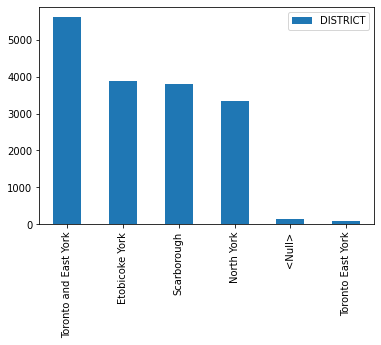

In [175]:
# Top 3 Districts
# 1)	Toronto and East York
# 2)	Etobicoke York
# 3)	Scarborough
district_count.plot(kind='bar', legend=True, stacked=True)

In [176]:
hood_count = ksi['HOOD_ID'].value_counts()
hood_count = hood_count.head(10)

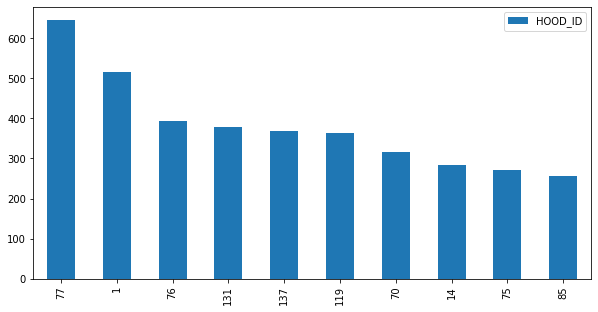

In [177]:
# Top 3 Neighbourhoods
# 1)	77 – Waterfront Communities-The Island (Toronto and East York)
# 2)	1 – West Humber-Clairville
# 3)	76 – Bay Street Corridor
hood_count.plot(kind='bar', legend=True, figsize=[10,5])

In [178]:
loc_count = ksi['LOCATION'].value_counts()
loc_count = loc_count.head(10)

In [179]:
loc_count

43.821345, -79.31689    25
43.797945, -79.42009    25
43.674445, -79.56319    25
43.836545, -79.25119    24
43.650845, -79.38659    23
43.688145, -79.30179    20
43.770045, -79.26129    20
43.644045, -79.37579    20
43.655745, -79.38379    20
43.639545, -79.38269    19
Name: LOCATION, dtype: int64

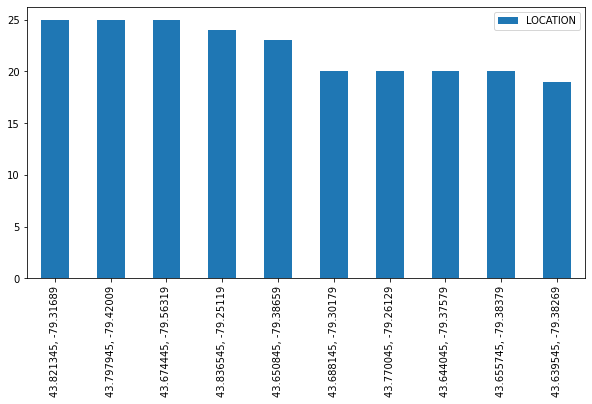

In [180]:
# Top Intersection
# 1) STEELES AVE E, BIRCHMOUNT RD (43.821345, -79.31689)
# 2) STEELES AVE E W, YONGE ST (43.797945, -79.42009)
# 3) EGLINTON AVE W, MARTIN GROVE RD (43.674445, -79.56319)
loc_count.plot(kind='bar', legend=True, figsize=[10,5])

In [181]:
ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HOUR        16860 non-null  int64 
 1   DISTRICT    16860 non-null  object
 2   LOCCOORD    16860 non-null  object
 3   TRAFFCTL    16860 non-null  object
 4   VISIBILITY  16860 non-null  object
 5   LIGHT       16860 non-null  object
 6   RDSFCOND    16860 non-null  object
 7   ACCLASS     16860 non-null  object
 8   IMPACTYPE   16860 non-null  object
 9   INVAGE      16860 non-null  object
 10  SPEEDING    16860 non-null  object
 11  AG_DRIV     16860 non-null  object
 12  REDLIGHT    16860 non-null  object
 13  ALCOHOL     16860 non-null  object
 14  DISABILITY  16860 non-null  object
 15  HOOD_ID     16860 non-null  int64 
 16  YEAR_1      16860 non-null  int64 
 17  MONTH_1     16860 non-null  int64 
 18  DAY_1       16860 non-null  int64 
 19  LOCATION    16860 non-null  object
dtypes: int

In [183]:
ksi.columns

Index(['HOUR', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVAGE', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_ID', 'YEAR_1', 'MONTH_1',
       'DAY_1', 'LOCATION'],
      dtype='object')

In [184]:
predictors = ['HOUR', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
              'RDSFCOND', 'IMPACTYPE', 'INVAGE', 'SPEEDING', 'AG_DRIV', 'REDLIGHT',
              'ALCOHOL', 'DISABILITY', 'HOOD_ID', 'YEAR_1', 'MONTH_1',
              'DAY_1', 'LOCATION']
outcome = 'ACCLASS'

In [185]:
X = pd.get_dummies(ksi[predictors], prefix_sep='_', drop_first=True)
y = ksi[outcome]

In [187]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [189]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [191]:
print(logit_reg.intercept_)
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index = X.columns))

[-1.32385218  0.42900804 -0.01089554]
                                    coef
HOUR                           -0.017023
HOOD_ID                        -0.003013
YEAR_1                         -0.000995
MONTH_1                         0.001140
DAY_1                          -0.002857
...                                  ...
LOCATION_43.853145, -79.17999  -0.506883
LOCATION_43.854145, -79.16969  -2.312406
LOCATION_43.854245, -79.17549   0.000000
LOCATION_43.855197, -79.171344 -0.346138
LOCATION_43.855445, -79.170284 -0.175862

[5431 rows x 1 columns]


In [192]:
logit_reg_prob = logit_reg.predict_proba(valid_X)
logit_reg_pred = logit_reg.predict(valid_X)

In [193]:
logit_result = pd.DataFrame({'actual': valid_y,
                             'p_0': [p[0] for p in logit_reg_prob],
                             'p_1': [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
15374,Fatal,0.113331,0.886669,Non-Fatal Injury
7768,Non-Fatal Injury,0.038167,0.961833,Non-Fatal Injury
4280,Non-Fatal Injury,0.012896,0.987104,Non-Fatal Injury
5834,Non-Fatal Injury,0.025680,0.974320,Non-Fatal Injury
15962,Fatal,0.071494,0.928506,Non-Fatal Injury
...,...,...,...,...
12989,Non-Fatal Injury,0.068496,0.931504,Non-Fatal Injury
13328,Non-Fatal Injury,0.057101,0.942899,Non-Fatal Injury
5265,Non-Fatal Injury,0.014601,0.985399,Non-Fatal Injury
1735,Non-Fatal Injury,0.022591,0.977409,Non-Fatal Injury


In [194]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9270)

       Prediction
Actual    0    1
     0  456  450
     1   42 5796
